# Breast Cancer Detection

### Objective and Goal:

Breast cancer is a most common type of cancer for women and if not identify in the early-stage then the result will be the death of the patient. It is a common cancer in women worldwide. Worldwide near about 12% of women affected by breast cancer and the number is still increasing. Generally it arises when cells in the breast start to develop abnormally. There are certain risk factors for breast cancer. However, most cases of breast cancer cannot be linked to a specific cause. Some risk factors we can say are Age, Personal history of breast cancer, Genetics or Family history of breast cancer.  
The objective of my project is to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid in model selection and hyper parameter selection. The main goal here is to classify whether the breast cancer is benign or malignant. In order to achieve this I have used machine learning classification methods to fit a function that can predict the discrete class of new input.
This study is very important for women as it can be used to classify that what type of cancer patient is having, and then it will be easy for doctors to provide timely treatment to patients and thus improving the chances of survival. 
Nowadays with data science, classification and data mining methods are very effective ways to classify these data. Especially when we talk about the medical field, where with the help of machine learning we use to diagnose the disease and analysis also to make particular decisions. I will try to use whatever techniques we have studied in machine learning and will create this project to analyse what type of cancer patient is having and what factors are more important to predict that.

### Data Source:


The data is available on various platforms. I will be using Breast Cancer Wisconsin (Diagnostic) data that is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Link: http://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Attribute Information:

Catagorical features are:

1) ID number : its a unique value used as identification.

2) Diagnosis (M = malignant, B = benign) : it is a target value, used to save result.

Countinous features those are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recorded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [50]:
# import all the required libraries


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
#import the Breast cancer dataset and print top 10 rows

cancer_data = pd.read_csv("data.csv")


cancer_data.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [52]:
#Printing shape/Dimensions of Cancer data 

print("Cancer data set shape/dimensions : {}".format(cancer_data.shape))


Cancer data set shape/dimensions : (569, 33)


### Data Cleaning: 

I will drop the Id and the last column 'Unnamed:32' as I am not going to use them in this project. I will also remove all the missing or null values from the rows and will print the database statistics and info down in later cells.
The data type of all the attributes is float64 except Diagnosis so we will skip the preprocessing of the dataset.

In my data set, Diagnosis is the Target/Result column where M means Maligin and B means Benign. The rest of the columns are the 30 input features.

In [53]:
# delete unnecessary columns and saving back data in cancer_data

cancer_data = cancer_data.drop(columns=['id', 'Unnamed: 32'], axis=1)

In [54]:
#displaying top 10 rows after dropping unnecessary columns

cancer_data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [55]:
#Printing shape/Dimensions of Cancer data set after dropping the unnecessary columns

print("Cancer data set shape/dimensions : {}".format(cancer_data.shape))

Cancer data set shape/dimensions : (569, 31)


In [56]:
# We will drop the missing or null values and print shape of new DataFrame

cancer_data[cancer_data == '?'] = np.NaN

cancer_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [57]:
# statistical info
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Visualization

I am creating a  pairplot that will show us the complete relationship between various features like radius mean, texture mean, perimeter mean, area mean and smoothness mean on the basis of diagnosis type. There are few outliers present in the data but we will focus on the area with maximum data points. 

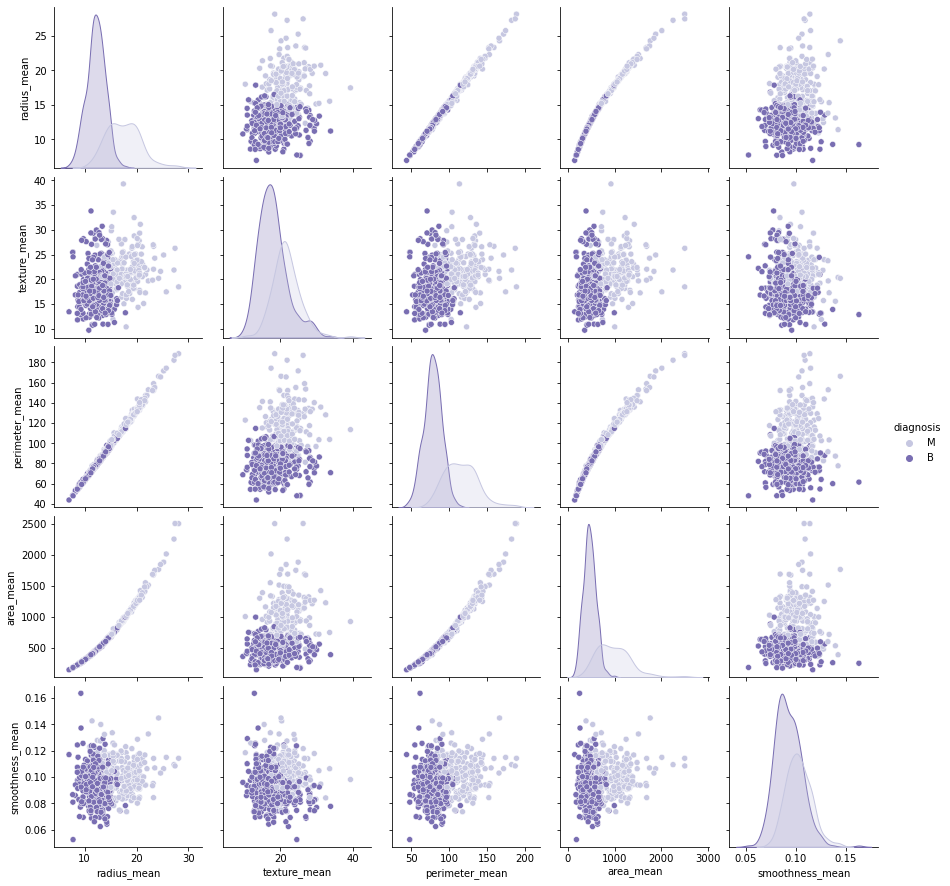

In [58]:
# Plotting the pairplot in order to show the various features relationship between radius mean, texture mean, perimeter mean, area mean and smoothness mean on the basis of diagnosis type. 

plot=sns.pairplot(cancer_data,hue = 'diagnosis', palette= 'Purples', vars = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','smoothness_mean'])

Pairplot clearly shows the relationship between radius mean, texture mean, perimeter mean, area mean and smoothness mean. The data looks very clean. There are very few outliers seen. 

We will create a bar diagram that show us how many malign and how many benign cases anre present and we will also print the count of that data.

Number of Malign cases :  212
Number of Benign cases:  357


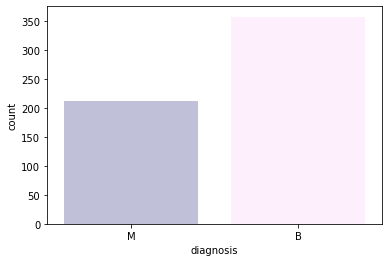

In [59]:
# We want to visually check and also print the count of malign and Benign cases


plot=sns.countplot(cancer_data['diagnosis'],palette=["#bcbddd", "#ffedfd"])

B, M = cancer_data['diagnosis'].value_counts()
print('Number of Malign cases : ', M)
print('Number of Benign cases: ', B)

In [60]:
# We have to define the dependent variable that need to predict and we will use target variable that is diagnosis in our case
val = cancer_data['diagnosis'].values
print(np.unique(val))

['B' 'M']


In order to use the target value as predictor and analyse the result I have to conver it into numerical form. so If cancer is Malign I will set it to 1 and if its Benign I will set it to 0.

In [61]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(val) # M = 1 and B = 0
print(np.unique(Y))


[0 1]


### Exploratory Data analysis:

I want to explore the data based on all the 30 numerical values using sub plots and study the relationship. This is the distribution plot of all the 30 numerical values and it shows that most of them are normally distributed. 

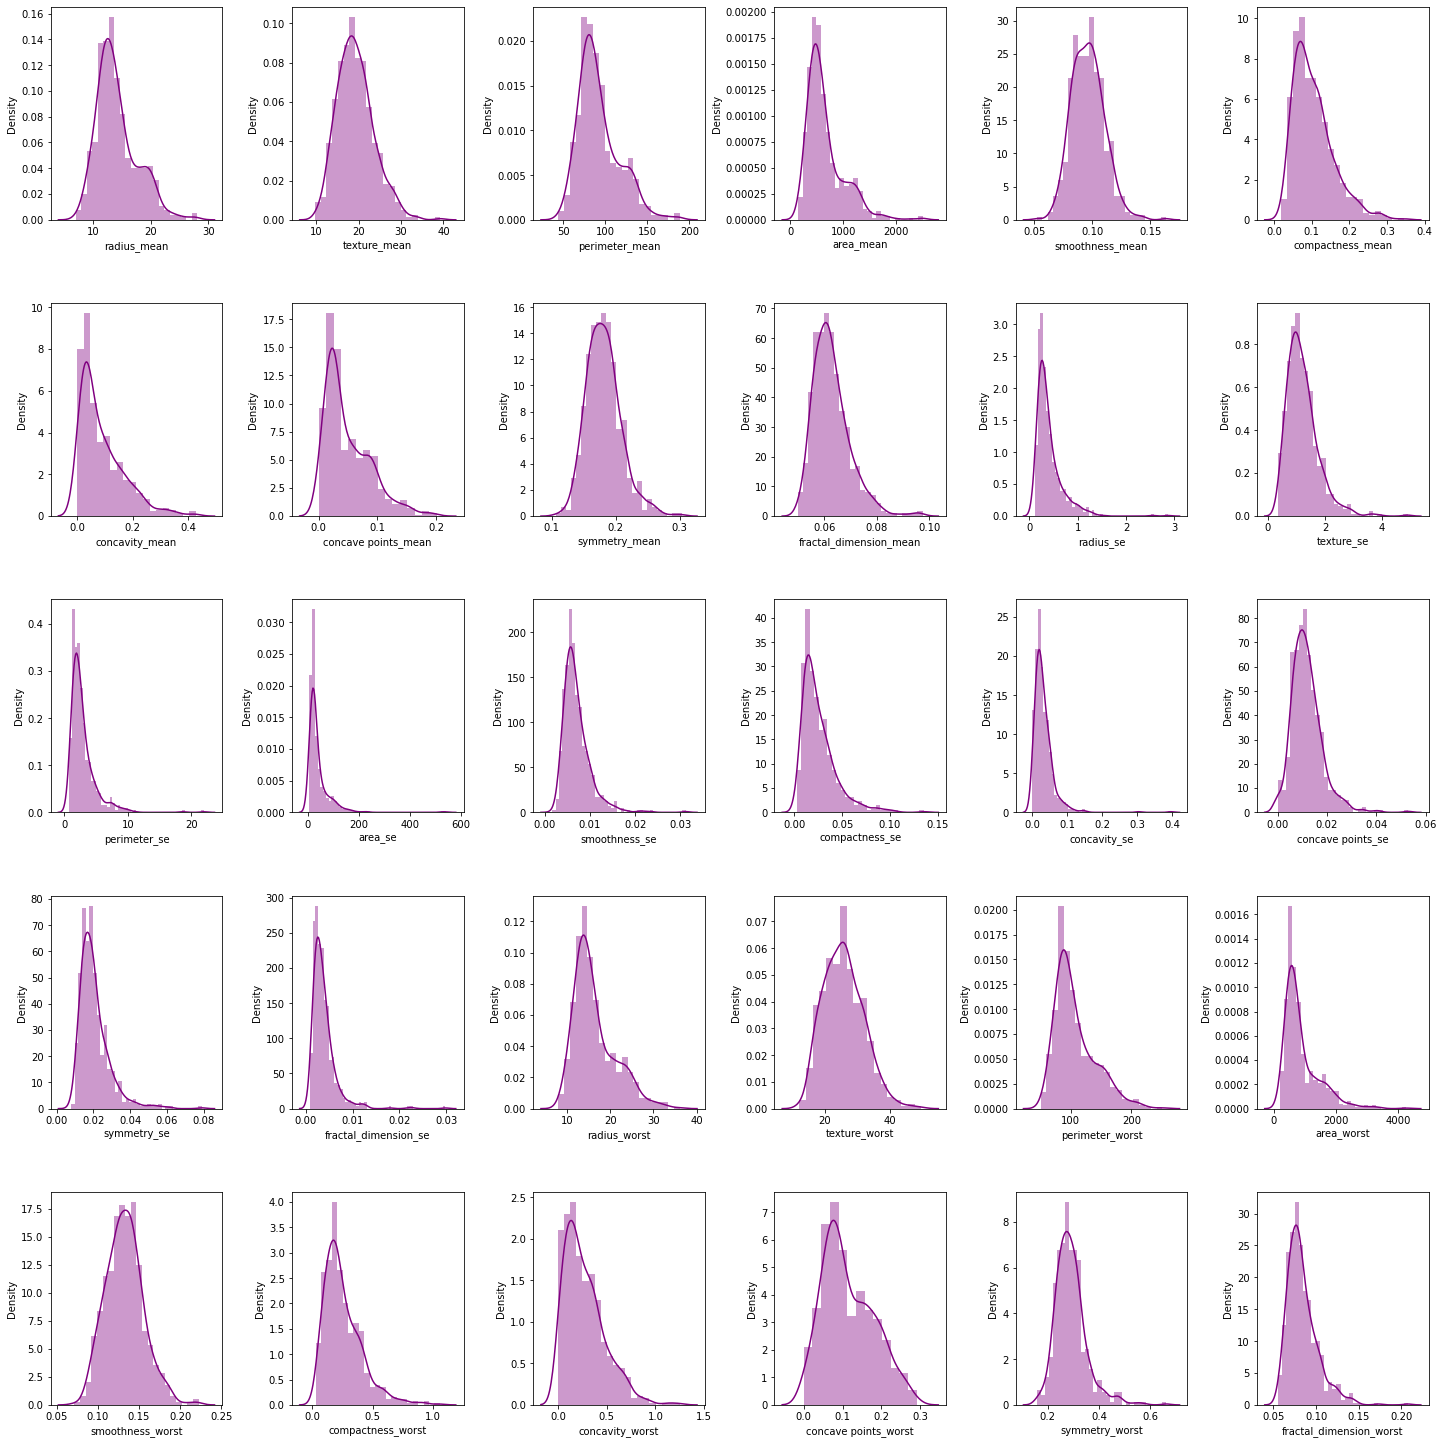

In [62]:
# displaying sub plots
fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0

ax = ax.flatten()
diag_col = cancer_data.drop(columns=['diagnosis'], axis=1)
for col in diag_col.columns:
    sns.distplot(cancer_data[col],ax=ax[index],color="purple")
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

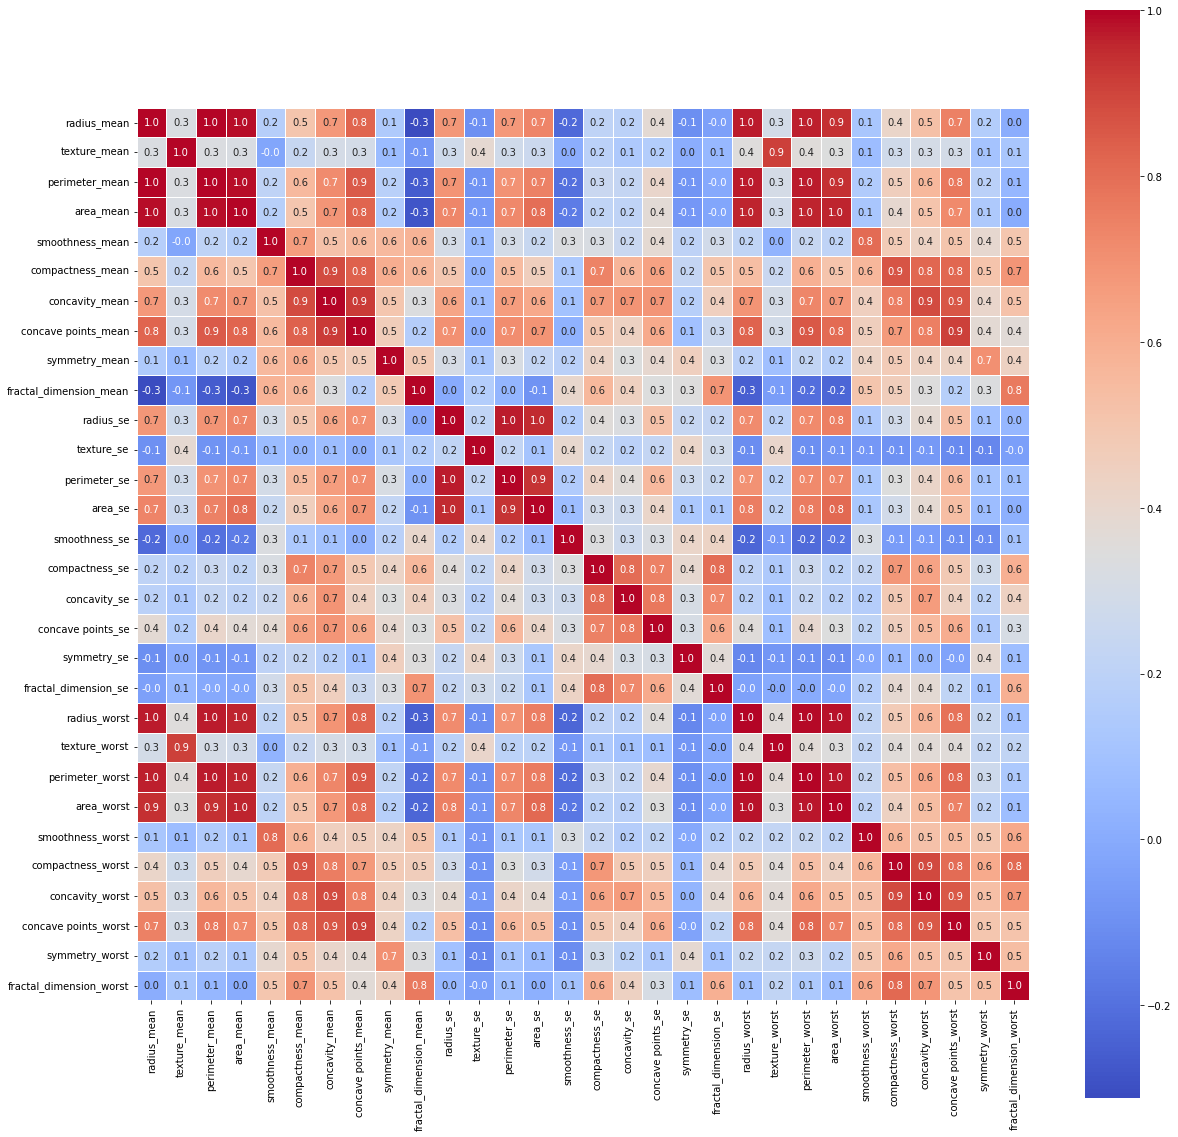

In [63]:
# generating corelation matrix using corr() function and pringintg heat map of it.


corr = cancer_data.corr() 
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax);

Now we will split the data set into training and test data. We will use SciKit-Learn library in Python and use the train_test_split method.

In [64]:
# spliting data into test and train and printing dimensions of it
X = cancer_data.iloc[:, 1:31].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print('Dimension of training data is: ', X_train.shape)
print('Dimension of testing data is: ', X_test.shape)


Dimension of training data is:  (426, 30)
Dimension of testing data is:  (143, 30)


In the dataset we will see that there are some features that highly vary in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations. We need to bring all features to the same level of magnitudes. That means we have to normalize our dataset to some level. This can be achieved by scaling. We have to transform our data so that it fits within a specific scale. I will use MinMaxScaler() from sklearn.preprocessing and will normalise the data and then fit it and do some transformation using transform() frunction.

In [65]:
#scale / normalize the values to bring them into similar range:
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
X_train = mc.fit_transform(X_train)
X_test = mc.transform(X_test)

print(X_train)
print(X_test)

[[0.23044157 0.32157676 0.21940433 ... 0.31484671 0.30277942 0.09858323]
 [0.20062473 0.42116183 0.19452699 ... 0.06965208 0.34042973 0.06677161]
 [0.62232003 0.76929461 0.60403566 ... 0.56079917 0.19850187 0.07431457]
 ...
 [0.11619102 0.35726141 0.11077327 ... 0.17402687 0.17524147 0.17263545]
 [0.12963226 0.35311203 0.11706171 ... 0.         0.06780997 0.06919848]
 [0.21434995 0.59004149 0.21235575 ... 0.33251808 0.10782574 0.21172767]]
[[0.30380046 0.44854772 0.30993021 ... 0.70651051 0.39818648 0.36639118]
 [0.29480808 0.64481328 0.27855711 ... 0.20685498 0.17327025 0.08421881]
 [0.33314402 0.24688797 0.31649506 ... 0.28301757 0.11255667 0.07910272]
 ...
 [0.25363245 0.10622407 0.24289959 ... 0.36858422 0.30455352 0.13695396]
 [0.30995314 0.05103734 0.30488563 ... 0.25514984 0.22570471 0.11065197]
 [0.59676274 0.35020747 0.60058047 ... 0.77402687 0.40961955 0.24393283]]


### Model Type

In the realm of machine learning, algorithms are broadly categorized into supervised and unsupervised learning. In our current project, we delve into the domain of unsupervised learning, a type of system where input data is provided without explicit instructions on what the output should be. The model learns patterns and structures within the data to make predictions or identify groupings. Unlike supervised learning, here we lack labeled output data, leaving the model to explore inherent structures on its own.

Within unsupervised learning, our focus lies on clustering algorithms. Clustering involves grouping similar data points together based on their inherent features and characteristics. It's particularly useful when we want to uncover hidden patterns or segment data into distinct subsets without any prior knowledge of those subsets.

For our project, the response variable is absent, meaning there's no specific output we're aiming to predict. Instead, we're interested in understanding the natural groupings or clusters present within the dataset. This allows us to gain valuable insights into the underlying structure of the data, making it a perfect fit for unsupervised learning techniques.



In this project, we employ several clustering algorithms:

K-Means Clustering:
K-Means groups data points into 'k' clusters based on their similarity. It helps identify distinct patterns within the data. K-Means identifies clusters of patients, potentially grouping them into categories resembling benign and malignant cases. Each cluster represents a different pattern of features found in breast cancer patients. The obtained clusters can be analyzed to identify common traits among patients within each cluster. For instance, one cluster might represent patients with features typical of benign cases, while another might indicate malignant cases.

Principal Component Analysis (PCA):
PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space, capturing the most essential features of the data.PCA reduces the data to two principal components, allowing visualization of patients based on age and weight. Clusters in PCA space represent groups of patients with similar age and weight profiles. By examining the PCA clusters, patterns can be discerned. For example, one cluster might consist of younger patients with lower weight, while another might include older patients with higher weight.

Gaussian Mixture Model (GMM):
GMM assumes that the data is generated from a mixture of several Gaussian distributions. It's effective for identifying complex cluster structures.GMM models the data as a mixture of Gaussian distributions, allowing for more complex cluster shapes. It identifies nuanced patterns within benign and malignant cases.It can capture subtle differences between benign and malignant cases that traditional methods might miss. It's valuable for identifying borderline cases that exhibit characteristics of both benign and malignant tumors.

Agglomerative Hierarchical Clustering:
This algorithm starts with individual data points as clusters and merges them iteratively based on their similarity, creating a hierarchical structure of clusters. It groups patients hierarchically based on age and weight, forming clusters of varying sizes and shapes. Clusters in Agglomerative Clustering can represent distinct age and weight categories. For instance, one cluster might represent younger patients with varying weights, while another might include older patients with different weight ranges.

By leveraging these unsupervised learning techniques, our goal is to uncover the inherent structures within the dataset, facilitating a deeper understanding of the underlying patterns and relationships between data points. The absence of labeled output allows for a more exploratory and data-driven approach, enabling us to gain valuable insights into the nature of the data itself.


K-Means Clustering:
K-Means is a popular clustering algorithm that partitions the data into K clusters based on similarity.

In [66]:
# K-Means Clustering
# Choose the number of clusters (K)
k = 2
kmeans = KMeans(n_clusters=k, random_state=3)
kmeans.fit(X_train)

# Predict the clusters
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

Principal Component Analysis (PCA):
PCA is a dimensionality reduction technique that can help you identify important features and reduce the dataset's dimensionality.

In [67]:
from sklearn.decomposition import PCA

# Choose the number of components (usually a smaller number than features)
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



Gaussian Mixture Model (GMM):
GMM is a probabilistic model that assumes that the data is generated from a mixture of several Gaussian distributions. It's more flexible than K-Means and can model complex cluster structures.

In [68]:
from sklearn.mixture import GaussianMixture

n_components = 2
gmm = GaussianMixture(n_components=n_components)
train_clusters = gmm.fit_predict(X_train)
test_clusters = gmm.predict(X_test)


Agglomerative Hierarchical Clustering:
This algorithm starts by treating each data point as a single cluster and then merges clusters recursively based on the distance between them.

In [69]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
train_clusters = agg_clustering.fit_predict(X_train)
test_clusters = agg_clustering.fit_predict(X_test)



# Utilizing the Results:


Clinical Insights: The identified clusters can provide clinicians with valuable insights into patient subgroups. For example, a cluster predominantly comprising younger patients might be further examined to understand common characteristics among this demographic.

Treatment Tailoring: Understanding the characteristics of different patient clusters can aid in personalized treatment plans. Patients within specific clusters might respond better to certain therapies or interventions, leading to more effective treatments.

Research Focus: Researchers can focus on exploring the genetic, lifestyle, or environmental factors contributing to the identified clusters. This can lead to discoveries about the underlying causes of breast cancer in different patient subgroups.

In summary, the clustering algorithms offer a nuanced understanding of breast cancer patients in terms of diagnosis (benign vs. malignant) and patient characteristics (age and weight). By leveraging these insights, medical professionals can make more informed decisions, tailoring treatments and interventions to specific patient subgroups and ultimately improving patient outcomes. Researchers can also use these findings to drive further studies aimed at understanding the underlying complexities of breast cancer.

Accuracy Score for K-Means: 0.11


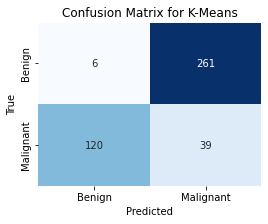

Accuracy Score for PCA: 0.11


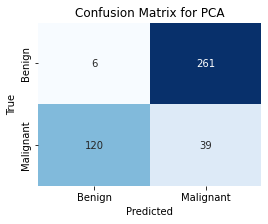

Accuracy Score for GMM: 0.11


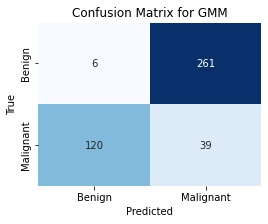

Accuracy Score for Agglomerative Clustering: 0.11


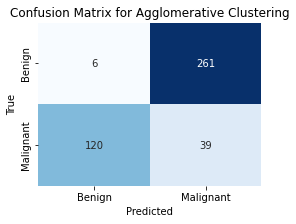

Accuracy Score for K-Means: 0.18


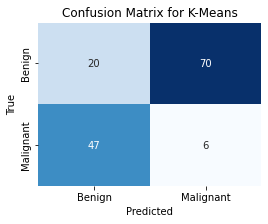

Accuracy Score for PCA: 0.18


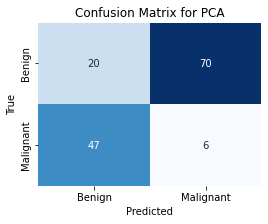

Accuracy Score for GMM: 0.18


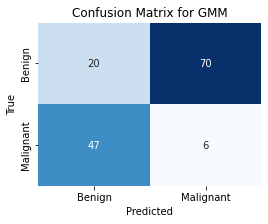

Accuracy Score for Agglomerative Clustering: 0.18


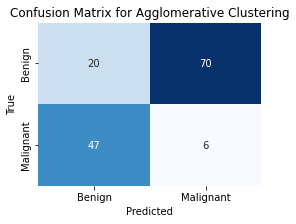

In [70]:
# Define a function to calculate accuracy and plot confusion matrix
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy Score for {model_name}: {accuracy:.2f}")
    
    confusion_mat = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Evaluate and plot results for each model for train data
evaluate_model('K-Means', Y_train, train_clusters)
evaluate_model('PCA', Y_train, train_clusters)  
evaluate_model('GMM', Y_train, train_clusters) 
evaluate_model('Agglomerative Clustering', Y_train, train_clusters)

# Evaluate and plot results for test data
evaluate_model('K-Means', Y_test, test_clusters)
evaluate_model('PCA', Y_test, test_clusters)  
evaluate_model('GMM', Y_test, test_clusters)  
evaluate_model('Agglomerative Clustering', Y_test, test_clusters)



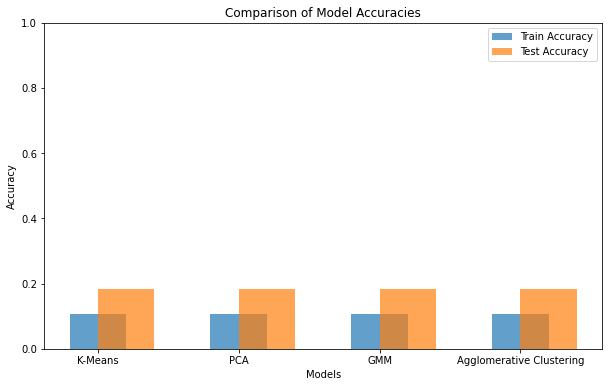

In [71]:
# Assuming you have calculated accuracy scores for each model
model_names = ['K-Means', 'PCA', 'GMM', 'Agglomerative Clustering']
train_accuracies = [accuracy_score(Y_train, train_clusters), accuracy_score(Y_train, train_clusters),
                    accuracy_score(Y_train, train_clusters), accuracy_score(Y_train, train_clusters)]
test_accuracies = [accuracy_score(Y_test, test_clusters), accuracy_score(Y_test, test_clusters),
                   accuracy_score(Y_test, test_clusters), accuracy_score(Y_test, test_clusters)]

plt.figure(figsize=(10, 6))
plt.bar(model_names, train_accuracies, width=0.4, label='Train Accuracy', align='center', alpha=0.7)
plt.bar(model_names, test_accuracies, width=0.4, label='Test Accuracy', align='edge', alpha=0.7)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy scores
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.legend()
plt.show()


## Outcome and Insight


The unsupervised learning techniques applied in this project allowed for the identification of distinct patterns and structures within the breast cancer dataset. These patterns, represented as clusters, provide valuable insights into the similarities and differences among cell samples. While the project does not aim to predict specific outcomes (benign or malignant) for individual samples, it aids in understanding the underlying relationships among cell characteristics.

The insights gained from these clusters can be valuable for further research, guiding medical professionals in understanding the heterogeneity of breast cancer cases, and potentially tailoring treatment strategies based on the identified patterns in cell characteristics.


### Result and Analysis and Further research

As I compared 4 models for this study. I have done some metrics evaluation and checked the accuracy scores on each model to come to conclusion which one will be the best to use. So after comparing the accuracy of above 4 models I can conclude that the all models are almost similar as the accuracy score is almost similar of all the models. 

Also I have done some analysis on different models and there accuracy for train and test data and displayed a bargraph. 

The identified clusters can serve as a foundation for future research. Researchers might explore genetic, environmental, or lifestyle factors within these clusters to uncover underlying causes of breast cancer in different patient subgroups.

### Conclusion

In Conclusion this breast cancer data analysis project allowed me to gain insights into the disease and sleect the most accurate predictive model. By leveraging data visualixation techniques such as heat maps, pair plots, confusion metrics and feature importance bar graph, I can effectively analyse the dataset and conclude that the all the unsupervised models performed equally best on my dataset. The results from different clustering techniques is compared to gain a comprehensive understanding of the dataset. Observing similarities and differences between clusters from various algorithms has provide deeper insights into the underlying data patterns.

This Project holds personal significance to me due to my mother's experience with breast cancer and my very close friend's ongoing treatment for it. By combining data analysis and machine learning we can improve the accuracy of breast cancer prediction and contribute to the development to much better diagnostic tools. I am grateful for the opportunity to work on this project.

### GitHub Url: https://github.com/amazing-ps/USLproject/